# Zomato Data Analysis Using Python
Python and its following libraries are used to analyze Zomato data.

- Numpy– With Numpy arrays, complex computations are executed quickly, and large calculations are handled efficiently.
- Matplotlib– It has a wide range of features for creating high-quality plots, charts, histograms, scatter plots, and more.
- Pandas– The library simplifies the loading of data frames into 2D arrays and provides functions for performing multiple analysis tasks in a single operation.
- Seaborn– It offers a high-level interface for creating visually appealing and informative statistical graphics. 
You can use Google Colab Notebook or Jupyter Notebook to simplify your task.
To address our analysis, we need to respond to the subsequent inquiries:

Do a greater number of restaurants provide online delivery as opposed to offline services?
Which types of restaurants are the most favored by the general public?
What price range is preferred by couples for their dinner at restaurants?
Before commencing the data analysis, the following steps are followed.

Following steps are followed before starting to analyze the data.
#### Step 1: Import necessary Python libraries.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Create the data frame.
use csv data file that exist in our file

In [54]:
dataframe = pd.read_csv("Zomato data .csv")
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


Before proceeding, let’s convert the data type of the “rate” column to float and remove the denominator.

In [55]:
def handlerate(value):
    value= str(value).split('/')
    value= float(value[0])
    return value
dataframe['rate']= dataframe['rate'].apply(handlerate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


To obtain a summary of the data frame, you can use the following code:

In [56]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


We will now examine the data frame for the presence of any null values. This stage scans each column to see whether there are any missing values or empty cells. This allows us to detect any potential data gaps that must be addressed.
Let’s explore the listed_in (type) column.

Text(0.5, 0, 'type of restaurant')

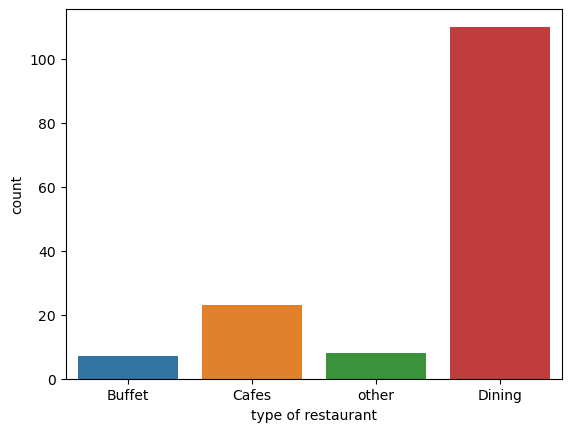

In [57]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel('type of restaurant')

## `Conclusion:  The majority of the restaurants fall into the dining category`

Text(0, 0.5, 'votes')

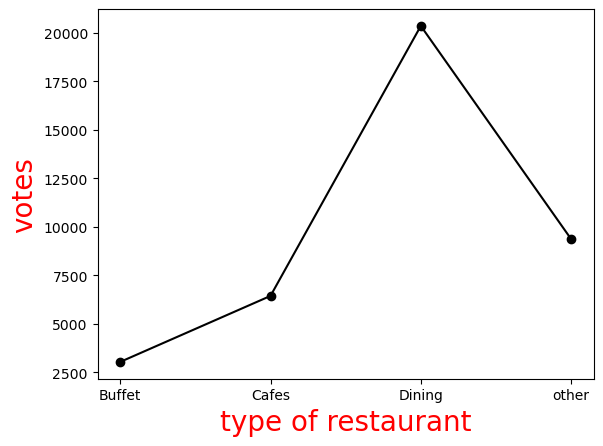

In [58]:
grouped_data= dataframe.groupby('listed_in(type)')['votes'].sum()
result= pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='black', marker='o')
plt.xlabel('type of restaurant', c='r', size= 20)
plt.ylabel('votes', c= 'r', size= 20)

## `Conclusion: Dining restaurants are preferred by a larger number of individuals`
Now we will determine the restaurant’s name that received the maximum votes based on a given dataframe.

In [59]:
max_votes= dataframe['votes'].max()
restaurant_with_max_votes= dataframe.loc[dataframe['votes'] == max_votes, 'name']
print(f'restaurant with most votes: {restaurant_with_max_votes} with \n {max_votes} votes')

restaurant with most votes: 38    Empire Restaurant
Name: name, dtype: object with 
 4884 votes


Let’s explore the online_order column.

Text(0.5, 0, 'online_order')

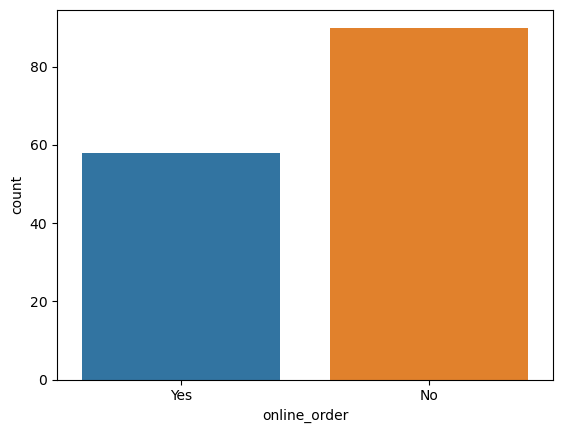

In [60]:
sns.countplot(x= dataframe['online_order'])
plt.xlabel('online_order')

## Conclusion: This suggests that a majority of the restaurants do not accept online orders
Let’s explore the rate column.

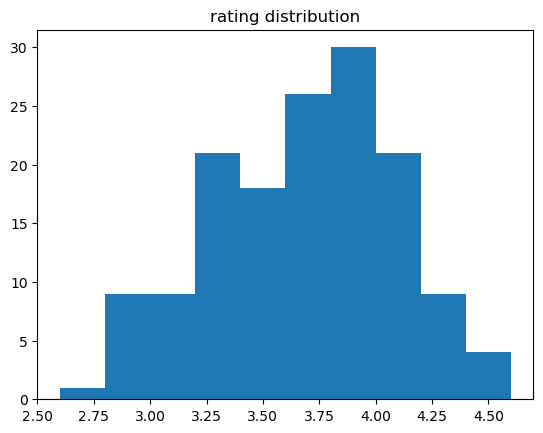

In [61]:
plt.hist(dataframe['rate'], bins= 10)
plt.title('rating distribution')
plt.show()

## Conclusion: The majority of restaurants received ratings ranging from 3.8 to 4.2
Let’s explore the approx_cost(for two people) column.

<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='count'>

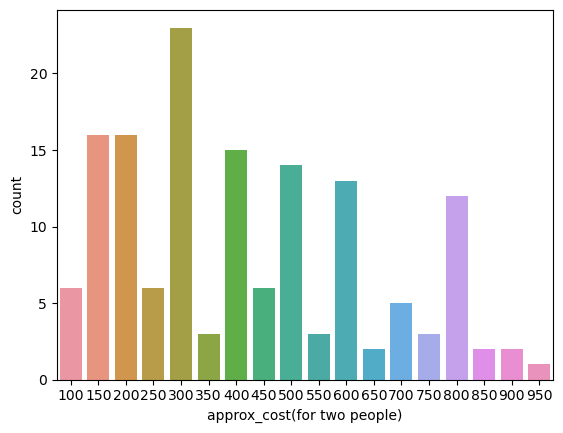

In [62]:
couple_data= dataframe['approx_cost(for two people)']
sns.countplot(x= couple_data)

## Conclusion: The majority of couples prefer restaurants with an approximate cost of 300 rupees
Now we will examine whether online orders receive higher ratings than offline orders.

<AxesSubplot:xlabel='online_order', ylabel='rate'>

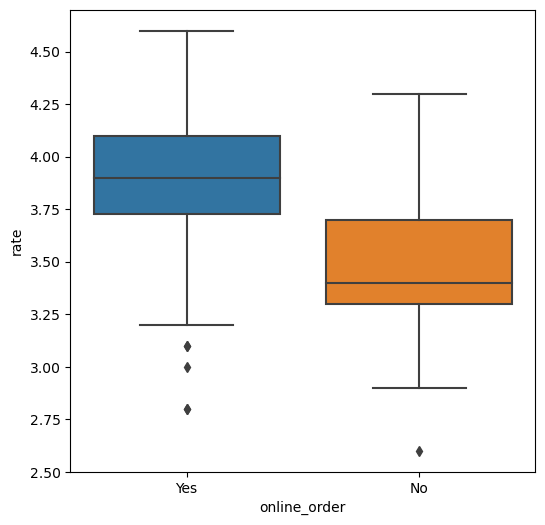

In [63]:
plt.figure(figsize= (6,6))
sns.boxplot(x= 'online_order', y= 'rate', data= dataframe)

## Conclusion: Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings

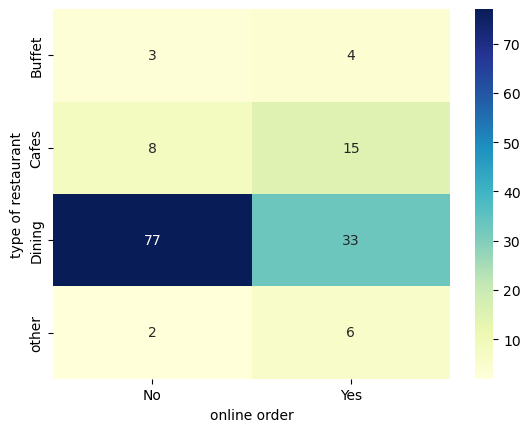

In [64]:
pivot_table= dataframe.pivot_table(index= 'listed_in(type)', 
                                   columns= 'online_order',
                                  aggfunc='size',
                                  fill_value=0)
sns.heatmap(pivot_table, annot= True, cmap= 'YlGnBu', fmt='d')
plt.xlabel('online order')
plt.ylabel('type of restaurant')
plt.show()

`Conclusion`: Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes

references:
https://www.geeksforgeeks.org/zomato-data-analysis-using-python/